In [171]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## A simple example function to show gradient descent.
$ f = 4*sin(x) + x^2$

In [172]:
f = lambda x: 4*np.cos(x) + x**2

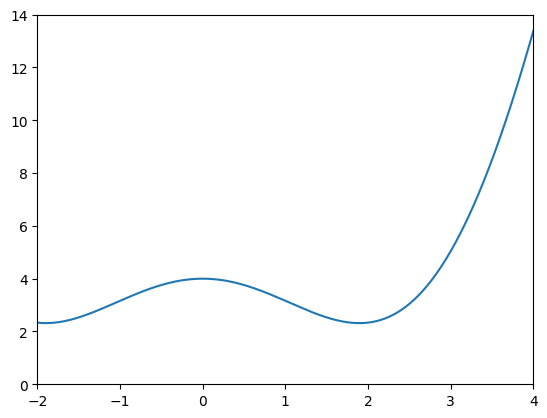

In [173]:
x = np.linspace(-2,4,1000)
plt.plot(x,f(x))
plt.xlim([-2,4])
plt.ylim([0,14])
plt.show()

In [174]:
x_old = 0
x_new = 4 # The algorithm starts at x=4
n_k = 0.1 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return -4*np.sin(x) + 2*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.8956824849096747
Number of steps: 22


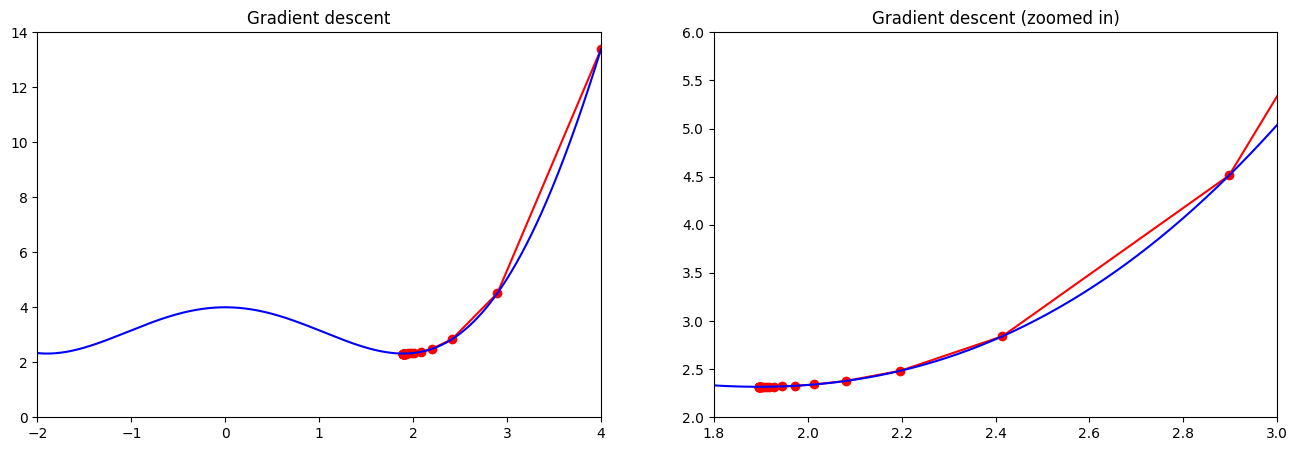

In [175]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,4])
plt.ylim([0,14])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.8,3])
plt.ylim([2,6])
plt.title("Gradient descent (zoomed in)")
plt.show()

In [176]:
def gradient_descent(
    X: np.ndarray,
    y: np.ndarray,
    theta: np.ndarray,
    alpha: float,
    num_iters: int
) -> tuple[np.ndarray, np.ndarray]:
    """
    Perform gradient descent to learn theta.

    Parameters
    ----------
    X : ndarray, shape (m, n)
        Design matrix with m training examples and n features.
    y : ndarray, shape (m,)
        Target values.
    theta : ndarray, shape (n,)
        Initial parameter vector.
    alpha : float
        Learning rate.
    num_iters : int
        Number of gradient descent iterations.

    Returns
    -------
    theta : ndarray, shape (n,)
        Learned parameter vector.
    J_history : ndarray, shape (num_iters,)
        Cost function value at each iteration.
    """
    m = y.shape[0]                        # number of training examples
    theta = theta.astype(float, copy=True)
    J_history = np.zeros(num_iters, dtype=float)

    for i in range(num_iters):
        # Hypothesis
        hypo = X @ theta                  # (m,)
        # Gradient of the cost w.r.t. theta
        gradient = (alpha / m) * (X.T @ (hypo - y))
        # Parameter update
        theta = theta - gradient

        # Optional: print for debugging
        # print(f"Iter {i+1}, Cost: {J_history[i]}")

    return theta, J_history